# Week 6 Lab Assignment: Model Comparison

### Objective
In this lab, you will implement multiple predictive models and compare their performance using different evaluation metrics. You will learn to select the most appropriate model for a dataset based on these comparisons.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: pandas, scikit-learn, matplotlib, numpy.

In [61]:
# Install necessary packages
%pip install pandas scikit-learn matplotlib numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, modeling, and evaluation.


In [62]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
%matplotlib inline

### 3. Load and Explore Dataset
**Objective:** Gain a preliminary understanding of the dataset to be used for modeling.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns.

In [63]:
import numpy as np
import pandas as pd

# generate a dataset of customer behavior that is used to predict whether a customer will purchase a product based on their behavior
# The dataset contains the following columns: Age,Income,Number_of_Purchases,Customer_Category,Target
# The Target column indicates whether the customer made a purchase (1) or not (0).
# The goal is to build a model that can predict whether a customer will make a purchase based on their behavior.
# Generate a synthetic dataset

np.random.seed(42)

# Create a DataFrame
data = {
    'Age': np.random.randint(18, 70, size=100),
    'Income': np.random.randint(20000, 120000, size=100),
    'Number_of_Purchases': np.random.randint(1, 10, size=100),
    'Customer_Category': np.random.choice(['A', 'B', 'C'], size=100),
    'Target': np.random.choice([0, 1], size=100)
}

df = pd.DataFrame(data)

# One-hot encode the 'Customer_Category' column
df = pd.get_dummies(df, columns=['Customer_Category'], drop_first=True)

# Save the dataset to a CSV file
df.to_csv('customer_behavior.csv', index=False)



# Load the dataset
df = pd.read_csv('customer_behavior.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())


   Age  Income  Number_of_Purchases  Target  Customer_Category_B  \
0   56   81228                    6       0                False   
1   69   68984                    8       1                False   
2   46   60774                    9       0                 True   
3   32   22568                    4       0                False   
4   60   82592                    1       1                False   

   Customer_Category_C  
0                False  
1                False  
2                False  
3                False  
4                 True  
Age                    0
Income                 0
Number_of_Purchases    0
Target                 0
Customer_Category_B    0
Customer_Category_C    0
dtype: int64
              Age         Income  Number_of_Purchases      Target
count  100.000000     100.000000           100.000000  100.000000
mean    43.350000   69474.690000             4.690000    0.520000
std     14.904663   29863.619229             2.718047    0.502117
min     19.000

### 4. Data Preparation
**Objective:** Prepare the data for modeling by handling missing values and encoding categorical variables.

**Tasks:**
1. **Handle Missing Values:** Deal with any missing values in the dataset.
2. **Encode Categorical Variables:** Convert categorical variables into numerical format using techniques like one-hot encoding.
3. **Train-Test Split:** Split the data into training and testing sets.

Training set size: (70, 5)
Test set size: (30, 5)
(70, 5) (70,)
(30, 5) (30,)


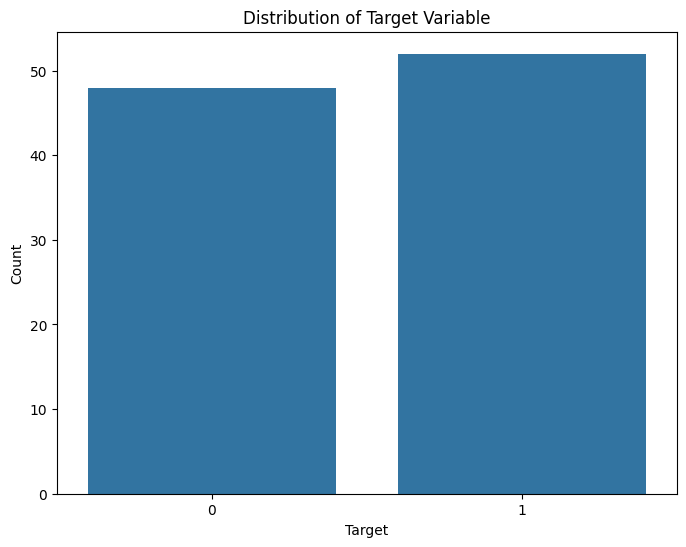

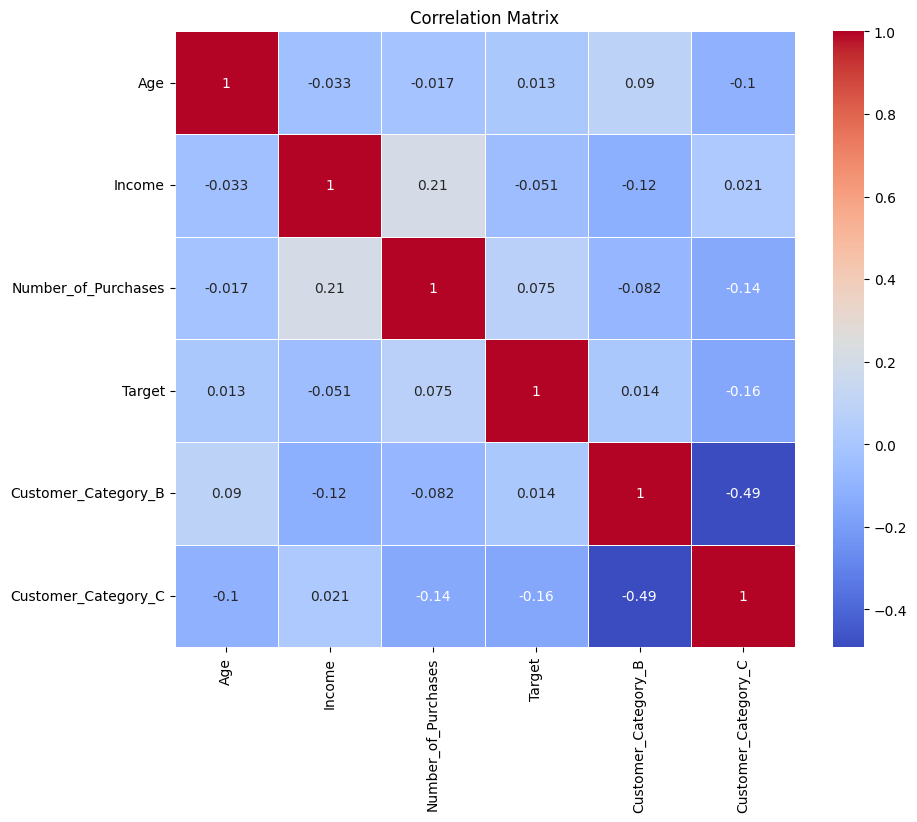

In [64]:
# Handle missing values
df = df.dropna()

# Encode categorical variables (if necessary)
df = pd.get_dummies(df, drop_first=True)

# Split the data into training and testing sets
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 5. Implementing and Evaluating Multiple Models
**Objective:** Build and evaluate multiple predictive models on the dataset.

**Tasks:**
1. **Implement Models:** Create and train logistic regression, decision tree, random forest, and gradient boosting models.
2. **Evaluate Models:** Use accuracy, precision, recall, and F1 score to evaluate the models' performance.

Logistic Regression Accuracy: 0.43333333333333335
Logistic Regression Precision: 0.5454545454545454
Logistic Regression Recall: 0.3333333333333333
Logistic Regression F1 Score: 0.41379310344827586


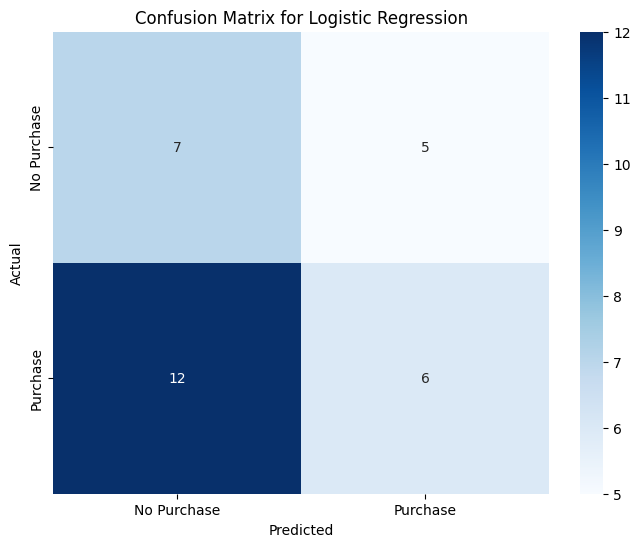

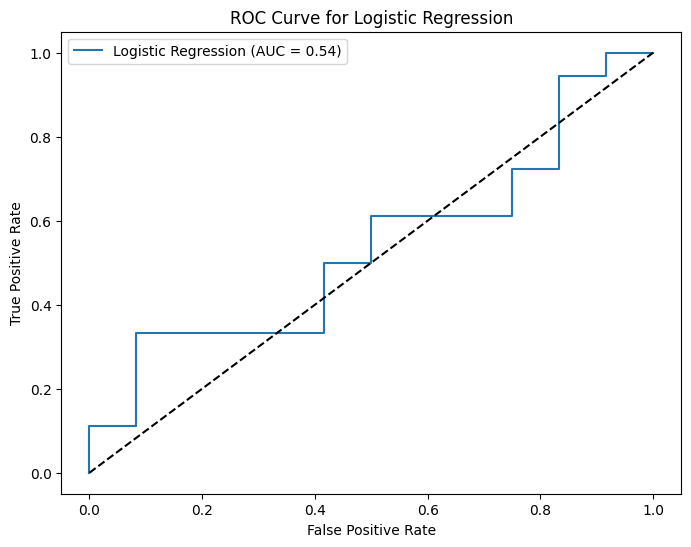

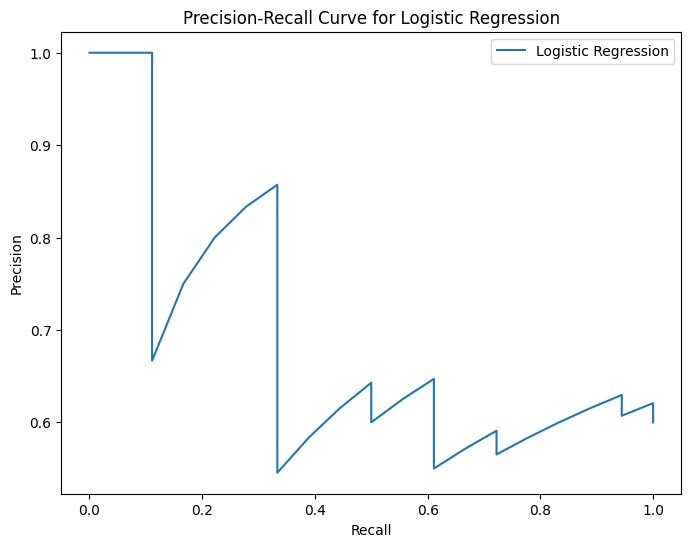

In [71]:
# Implementing Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Logistic Regression Precision: {logistic_precision}')
print(f'Logistic Regression Recall: {logistic_recall}')
print(f'Logistic Regression F1 Score: {logistic_f1}')

# Plot confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
# Plot ROC Curve for Logistic Regression

logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
logistic_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curve for Logistic Regression

logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(logistic_recall, logistic_precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()


Decision Tree Accuracy: 0.3
Decision Tree Precision: 0.38461538461538464
Decision Tree Recall: 0.2777777777777778
Decision Tree F1 Score: 0.3225806451612903


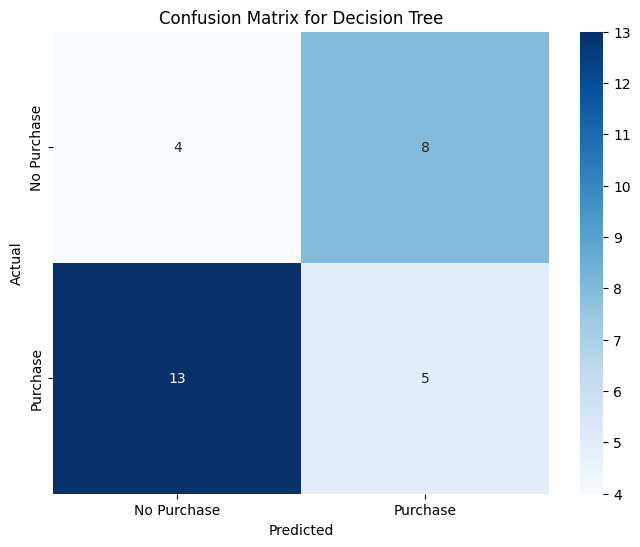

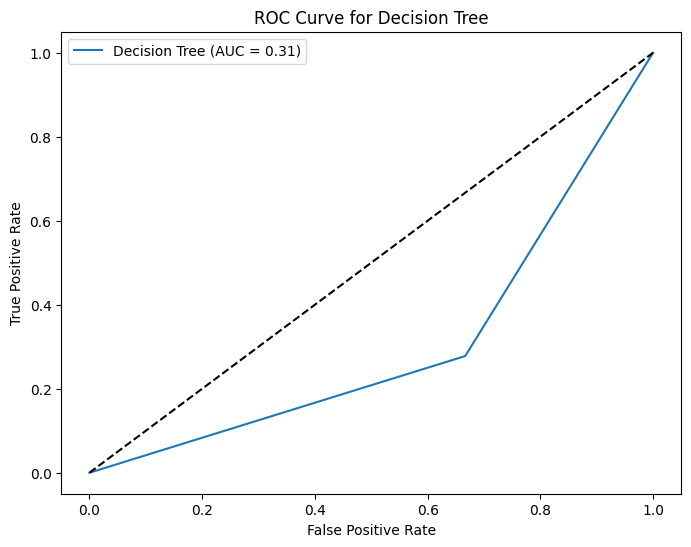

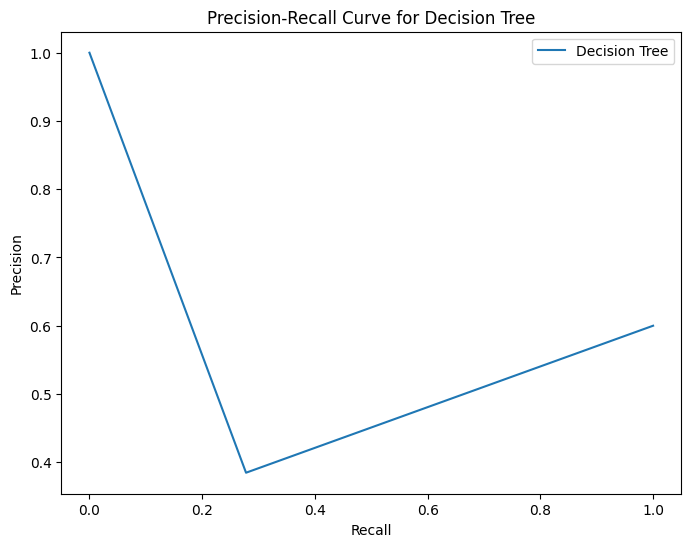

In [72]:
# Implementing Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Evaluate Decision Tree
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions)
tree_recall = recall_score(y_test, tree_predictions)
tree_f1 = f1_score(y_test, tree_predictions)
print(f'Decision Tree Accuracy: {tree_accuracy}')
print(f'Decision Tree Precision: {tree_precision}')
print(f'Decision Tree Recall: {tree_recall}')
print(f'Decision Tree F1 Score: {tree_f1}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, tree_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Plot ROC Curve for Decision Tree
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
tree_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree (AUC = {tree_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curve for Decision Tree
tree_precision, tree_recall, _ = precision_recall_curve(y_test, tree_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(tree_recall, tree_precision, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc='best')
plt.show()

Random Forest Accuracy: 0.4
Random Forest Precision: 0.5
Random Forest Recall: 0.2777777777777778
Random Forest F1 Score: 0.35714285714285715


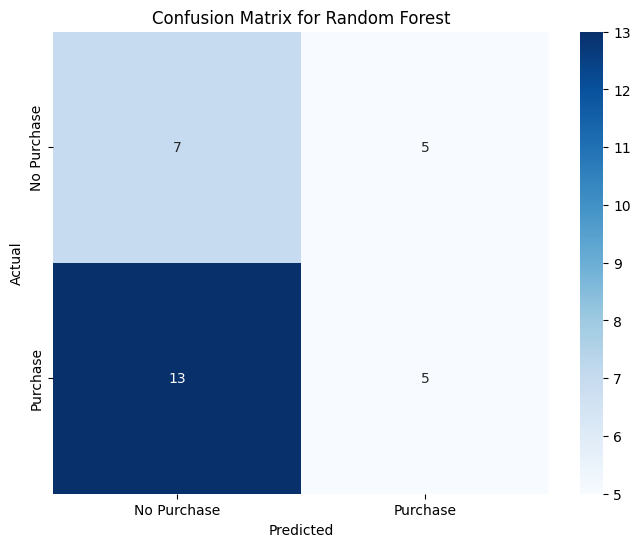

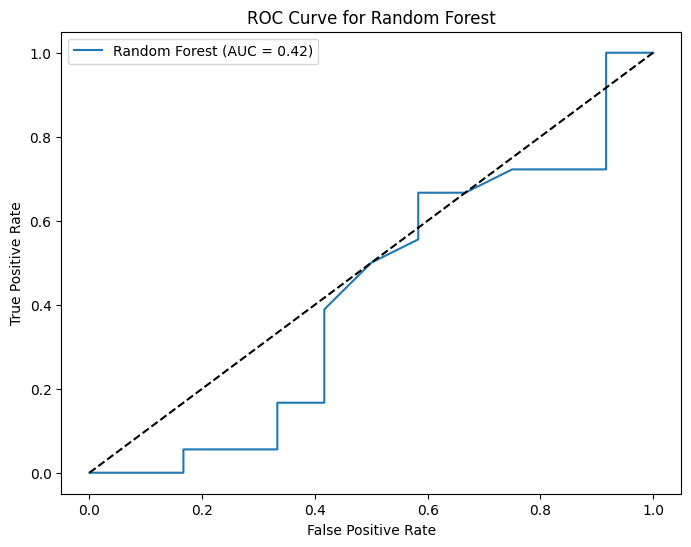

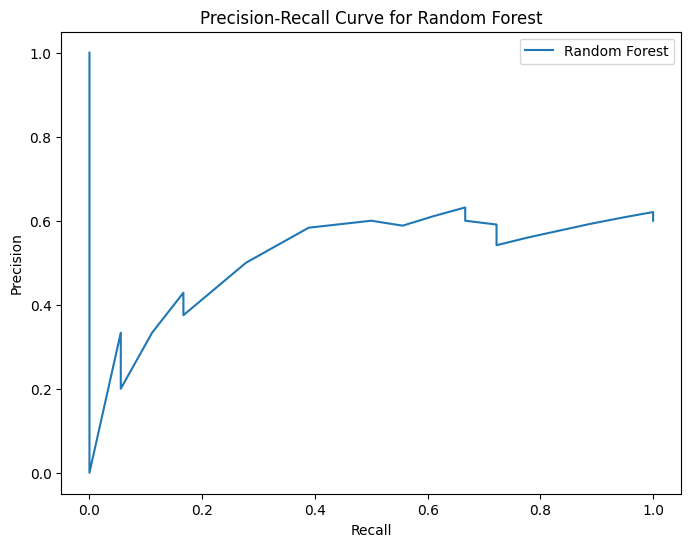

In [73]:
# Implementing Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest Precision: {rf_precision}')
print(f'Random Forest Recall: {rf_recall}')
print(f'Random Forest F1 Score: {rf_f1}')
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Plot ROC Curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curve for Random Forest
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='best')
plt.show()

Gradient Boosting Accuracy: 0.3333333333333333
Gradient Boosting Precision: 0.4375
Gradient Boosting Recall: 0.3888888888888889
Gradient Boosting F1 Score: 0.4117647058823529


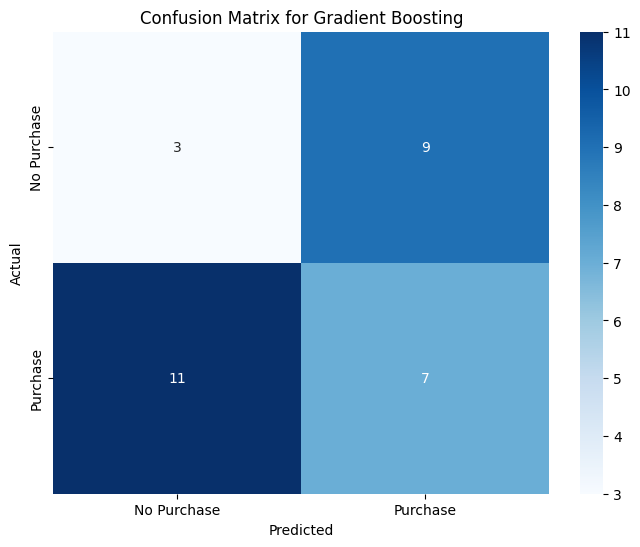

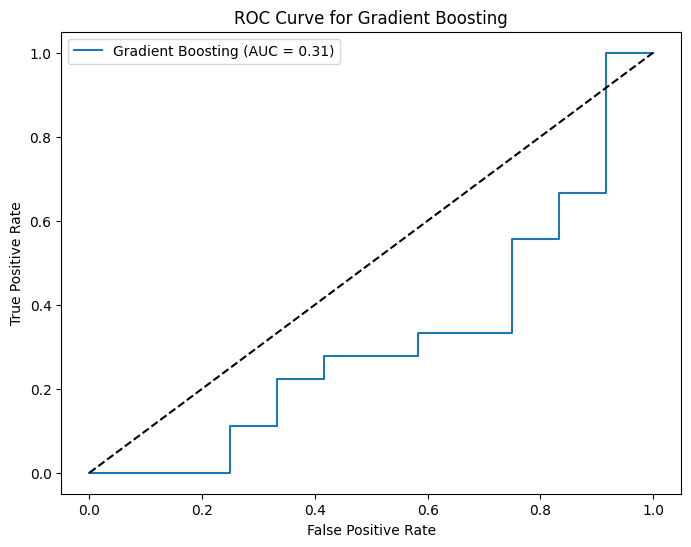

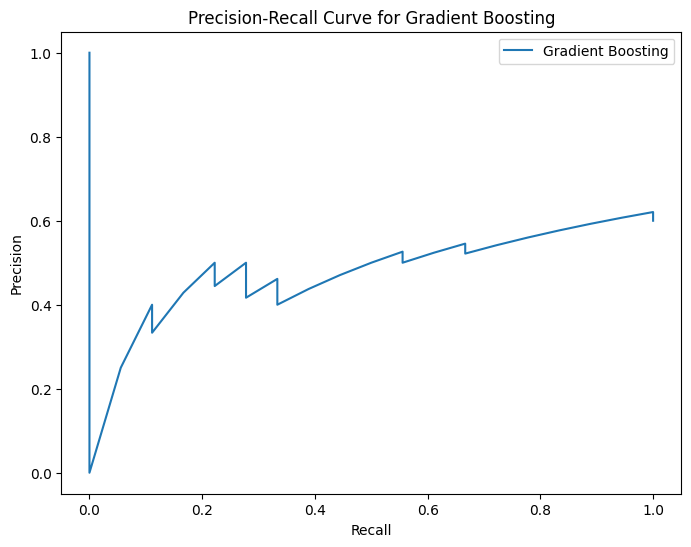

In [74]:
# Implementing Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')
print(f'Gradient Boosting Precision: {gb_precision}')
print(f'Gradient Boosting Recall: {gb_recall}')
print(f'Gradient Boosting F1 Score: {gb_f1}')
# Plot confusion matrix for Gradient Boosting
conf_matrix = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()
# Plot ROC Curve for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
gb_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curve for Gradient Boosting
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(gb_recall, gb_precision, label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc='best')
plt.show()

### 6. Comparing Model Performance
**Objective:** Compare the performance of logistic regression, decision tree, random forest, and gradient boosting models.

**Tasks:**
1. **Compare Metrics:** Print and compare the accuracy, precision, recall, and F1 scores of all models.
2. **Model Selection:** Discuss which model performed best and why.

Logistic Regression Accuracy: 0.43333333333333335, Precision: 0.5454545454545454, Recall: 0.3333333333333333, F1 Score: 0.41379310344827586
Decision Tree Accuracy: 0.3, Precision: 0.38461538461538464, Recall: 0.2777777777777778, F1 Score: 0.3225806451612903
Random Forest Accuracy: 0.4, Precision: 0.5, Recall: 0.2777777777777778, F1 Score: 0.35714285714285715
Gradient Boosting Accuracy: 0.3333333333333333, Precision: 0.4375, Recall: 0.3888888888888889, F1 Score: 0.4117647058823529


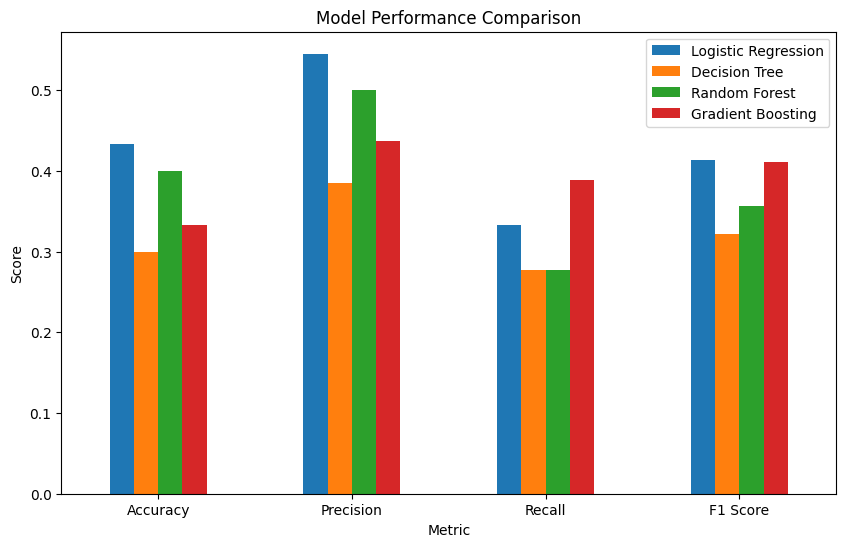

In [69]:
# Compare model performance
print(f'Logistic Regression Accuracy: {logistic_accuracy}, Precision: {logistic_precision}, Recall: {logistic_recall}, F1 Score: {logistic_f1}')
print(f'Decision Tree Accuracy: {tree_accuracy}, Precision: {tree_precision}, Recall: {tree_recall}, F1 Score: {tree_f1}')
print(f'Random Forest Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}')
print(f'Gradient Boosting Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, F1 Score: {gb_f1}')

# Discuss model performance
# (Provide your analysis here based on the results)
# Plotting model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logistic_scores = [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]
tree_scores = [tree_accuracy, tree_precision, tree_recall, tree_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
gb_scores = [gb_accuracy, gb_precision, gb_recall, gb_f1]

scores_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': logistic_scores,
    'Decision Tree': tree_scores,
    'Random Forest': rf_scores,
    'Gradient Boosting': gb_scores
})

scores_df.set_index('Metric', inplace=True)
scores_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

### 7. Using Cross-Validation for Model Evaluation
**Objective:** Apply cross-validation to evaluate the stability and reliability of model performance.

**Tasks:**
1. **Perform Cross-Validation:** Use cross-validation to evaluate the models' performance.
2. **Interpret Results:** Analyze cross-validation results to understand model reliability.

Logistic Regression Cross-Validation Scores: [0.4  0.55 0.5  0.25 0.65]
Decision Tree Cross-Validation Scores: [0.35 0.4  0.65 0.3  0.4 ]
Random Forest Cross-Validation Scores: [0.45 0.45 0.5  0.45 0.55]
Gradient Boosting Cross-Validation Scores: [0.45 0.45 0.6  0.3  0.35]


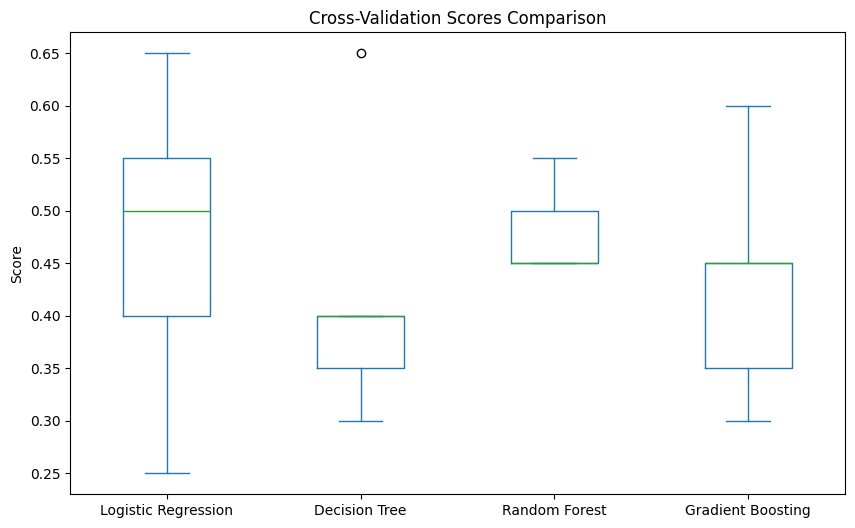

In [70]:
# Perform cross-validation
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=5)
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5)



# Print cross-validation results
print(f'Logistic Regression Cross-Validation Scores: {logistic_cv_scores}')
print(f'Decision Tree Cross-Validation Scores: {tree_cv_scores}')
print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print(f'Gradient Boosting Cross-Validation Scores: {gb_cv_scores}')
# Plot cross-validation results
cv_scores_df = pd.DataFrame({
    'Logistic Regression': logistic_cv_scores,
    'Decision Tree': tree_cv_scores,
    'Random Forest': rf_cv_scores,
    'Gradient Boosting': gb_cv_scores
})

cv_scores_df.plot(kind='box', figsize=(10, 6))
plt.title('Cross-Validation Scores Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

### 8. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code and model evaluations.
- A brief report (1-2 paragraphs) summarizing the findings, comparing model performance, and discussing the best model choice based on evaluation metrics and cross-validation results.

**Deadline:** Submit your completed notebook and report to the course portal by the end of class.